# Fractals

## Complex Newton's Method

In [2]:
def newton(f, f_prime, x0, eps=1e-8, max_iter=1e5):
    x = x0
    for _ in range(int(max_iter)):
        y = f(x)
        z = f_prime(x)
        if z == 0 or abs(y) < eps:
            break
        x -= y/f_prime(x)
    return x, abs(y)

# our first function
def f(x):
    return x**2 + 1

def f_prime(x):
    return 2*x

newton(f, f_prime, 0.1 + 1j)


((-3.0097253200397857e-11+1.0000000000712528j), 1.5469716888295374e-10)

So, ignoring the really small terms, this is saying that we achieve a root of the function at $i$.

## Roots of $x^2 - 1$

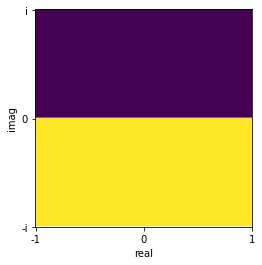

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# how many points to sample along each axis
l = 100

def make_plot(f, f_prime):
    vals = []
    nums = np.linspace(-1, 1, l)

    # evaluate newton on grid
    for a in nums:
        row = []
        for b in nums:
            x0 = a + 1j*b
            row.append([newton(f, f_prime, x0)[0]])
        vals.append(row)

    # so the axes are pointing the right directions
    vals = np.transpose(np.array(vals).reshape(l, l))

    # plotting
    plt.imshow(vals.imag)
    plt.xlabel("real")
    plt.ylabel("imag")

    plt.xticks([0, l//2, l], [-1, 0, 1])
    plt.yticks([0, l//2, l], ["i", 0, "-i"])

make_plot(f, f_prime)

This plot shows which root Newton's method converges to for different seed values on the polynomial expression $x^2 + 1$. This expression has two roots, $i$ (purple) and $-i$ (yellow). We can see that the method converges to whichever is closer. When the imaginary component is negative, the derivative in the imaginary direction is negative, and the value is pushed to $-i$. Similarily, positive seeds are pushed to positive $i$.

When the imaginary part of the seed is zero (at the boundary of the two colors), the imaginary component of the derivative is also zero. So, the method will not converge to either root.

## Roots of $x^3 - 1$

The polynomial expression $x^3 - 1$ has three roots: $1$, $-i^{2/3}$, and $i^{4/3}$.

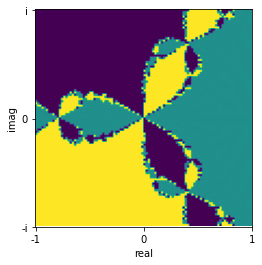

In [95]:
make_plot(lambda x:x**3 - 1, lambda x:3*x**2)

This plot shows the root that Newton's method converges to for different seed values. Rather than using an RGB code, I opted to just plot the magnitude of the imaginary part of the root that is found. For these polynomials, this is enough to distinguish the roots with different colors. In this plot, purple represents the $-i^{2/3}$. Blue represents $1$. Yellow represents $i^{4/3}$. We can see that, in a majority of cases, the seed will converge to the closest route. However, that is not always the case, and there are complicated patterns towards the center.

The function is cubic, so the only way for Newton's method to fail to converge is for it to get stuck at one of the nonzero optima of the function. Everywhere else, the derivative will be nonzero and pointed in the correct direction. So, the method will converge.

## Roots of $x^5 - 1$

In [4]:
import sympy as sp
x = sp.Symbol("x", complex=True)

[sp.N(i) for i in sp.solve(x**5 - 1)]

[1.00000000000000,
 0.309016994374947 - 0.951056516295154*I,
 0.309016994374947 + 0.951056516295154*I,
 -0.809016994374947 - 0.587785252292473*I,
 -0.809016994374947 + 0.587785252292473*I]

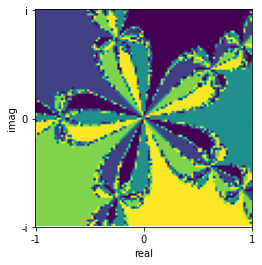

In [5]:
make_plot(lambda x:x**5 - 1, lambda x:5*x**4)

# Strange Attractors

# PDE Solver

# Another Transform

$$
\mathcal{L}\{f\}(s) = \int_0^\infty {f(t) \over e^{st}} dt
$$

## Linearity

$$
\mathcal{L}\{f + g\}(s) = \int_0^\infty {f(t) + g(t) \over e^{st}} dt
$$

Distribute the integral,

$$
\int_0^\infty {f(t) \over e^{st}} dt + \int_0^\infty {g(t) \over e^{st}} dt
$$

Which we recognize,

$$
\mathcal{L}\{f\}(s) + \mathcal{L}\{g\}(s)
$$

## Existence

The transform will only exist if that infinite integral exists. Sometimes, it doesn't. For example, let $f(x) = e^x$.

$$
\mathcal{L}\{f\}(s) = \int_0^\infty {f(t) \over e^{st}} dt
$$

$$
\mathcal{L}\{f\}(s) = \int_0^\infty {e^t \over e^{st}} dt
$$

$$
\mathcal{L}\{f\}(s) = \int_0^\infty e^{s} dt
$$

The $e^s$ is always positive. So, the integral diverges.

## Step Function

Let $u(x)$ represent the step function, such that,

$$
u(x) =
\left\{
\begin{array}{ll}
      0 & x \lt 0 \\
      1 & x \ge 0
\end{array} 
\right.
$$

We can get an expression for the Laplace transform.

$$
\mathcal{L}\{u\}(s) = \int_0^\infty {u(t) \over e^{st}} dt
$$

Since $u(t)$ is always 1 on the domain of the integral, we can replace it with a one.

$$
\mathcal{L}\{u\}(s) = \int_0^\infty e^{-st} dt
$$

$$
= {1 \over -s} \int_0^\infty -s e^{-st} dt
$$

$$
= {1 \over -s} \Big[ e^{-st} \Big]_0^\infty + C
$$

$$
= {1 \over -s} \lim_{t \to \infty} (e^{-st} - 1) + C
$$

When $s$ is negative, the sign of the exponent will be positive, and the whole thing will go to infinity. When $s$ is zero, the exponent will be zero and so the $\exp$ expression will be 1. So, the whole expression will be $0$. When $s$ is positive, the sign if the exponent will be negative and the $\exp$ goes away. We just end up with a $-1$ from the limit and a $1/s$ from the entire expression.

$$
\mathcal{L}\{u\}(s) = 
\left\{
\begin{array}{ll}
      \infty & x \lt 0 \\
      C & s = 0\\
      C/s & s \gt 0
\end{array} 
\right.
$$

## Laplace of Derivative

Let, $$\mathcal{L}\{y\}(s) = Y$$

Now, we compute the Laplace transform of $y'$.

$$
\mathcal{L}\{y'\}(s) = \int_0^\infty {y'(t) \over e^{st}} dt
$$

Integrate by parts

$$
\begin{array}{ll}
    v = y & dv = y'\\
    u = e^{-st} & du = -se^{-st}
\end{array}
$$

$$
\mathcal{L}\{y'\}(s) = \big[y e^{-st} \big]_0^\infty - \int_0^\infty -se^{-st}y dt
$$

$$
\mathcal{L}\{y'\}(s) = \big[y e^{-st} \big]_0^\infty + s \int_0^\infty e^{-st}y dt
$$

$$
\mathcal{L}\{y'\}(s) = \big[y e^{-st} \big]_0^\infty + s Y
$$

At $s = \infty$, the left term will just be zero, because there is a negative $s$ in the exponent. At $s=0$, the exponential term will be one. So, the whole left hand term just evaluates to $-y(0)$.

$$
\mathcal{L}\{y'\}(s) = s Y - y(0)
$$

So, when we differentiate the function, we multiply the Laplace transform by $s$ and subtract the initial condition.

## Solving the IVP

Let $u(t)$ represent the step function. Assume $y$ is a function of $t$. We want to solve the IVP,

$$
y' + y = u
$$

With initial condition $y(0) = 1$

Laplace both sides:

$$
\mathcal{L}(y' + y) = \mathcal{L}u
$$

By linearity,

$$
\mathcal{L}y' + \mathcal{L}y = \mathcal{L}u
$$

Use our formula for Laplace of derivative, continuing to use $Y$ to represent the Laplace transform of $y$.

$$
(sY - y(0)) + Y = \mathcal{L}u
$$

From the initial condition, we know that $y(0) = 1$.

$$
(s + 1)Y - 1 = \mathcal{L}u
$$

$$
Y = {\mathcal{L}u + 1 \over s + 1}
$$

At every time greater than zero, we can substitute $C/s$ in for $\mathcal{L}u$, yielding,

$$
Y = {C/s + 1 \over s + 1}
$$

## Using the Laplace Tranform

The Laplace transform is nice because it gives us a way to replace differentiation with multiplication. Derivatives on $y$ become multiplication on $Y$. In addition, it's linear. So, a linear combination of derivatives on $y$ is equivalent to a polynomial of $Y$. Laplace takes in calculus and gives us algebra.

# Reflection

**Leo**

I got better at coding this semester, especially at using numpy and scipy. I also feel like I know a lot more about the theory around scientific computing. I have a better understanding of how these work under the hood (from CS154), and I'm a lot more familiar with the documentation. I think this was probably the biggest gain in terms of things I will use in the future.

I still feel pretty shaky on many of the mathier parts, especially around differential equations. I never really understood integrating factors, and I think I would need help to push through any of the harder analytical problems. I do feel equipped to use numerical solvers though, and I think I know enough of the theory to be useful. The ideas around bifurcations, steady states, and systems of linear equations are all fairly simple conceptually once you understand them, and I think I will remember them. For example, in CS166, I had to do a theoretical approximation to a simulation we were writing, so I used a linear system of differential equations like we learned about in CS154.